In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import stochoptim.stochprob.network_design.network_design_problem as ndp
import stochoptim.stochprob.network_design.network_design_solution as nds
import stochoptim.stochprob.network_design.network_design_uncertainty as ndu

### Generate Problem Parameters

In [2]:
n_origins = 2
n_destinations = 2
n_intermediates = 4
#------------
param = ndp.generate_random_parameters(n_origins, n_destinations, n_intermediates)
param

{'n_origins': 2,
 'n_destinations': 2,
 'n_intermediates': 4,
 'opening_cost': array([[ 8,  5,  9,  9,  8,  8,  9,  8],
        [ 8,  7,  4,  5,  6,  5,  7,  3],
        [ 3,  6,  6,  4,  4,  3,  4,  6],
        [ 4,  7,  6,  4,  5,  7,  5,  5],
        [ 4,  6, 10,  4,  6,  4,  8,  4],
        [ 9,  6, 10,  5,  4,  4,  9, 10],
        [ 5,  4,  7,  8, 10,  7,  6,  4],
        [ 5,  9,  8,  6, 10,  4,  7,  6]]),
 'shipping_cost': array([[   5,    8,    9,    5,   10,    8, 1000, 1000],
        [   9,    6,    6,    9,    7,    6, 1000, 1000],
        [   8,   10,   10,    6,    6,    8,   10,    7],
        [   9,    6,    7,    9,    7,   10,    5,   10],
        [   6,   10,    8,    9,    5,    9,    9,    6],
        [  10,    5,    7,    8,    6,    7,    7,    9],
        [   8,    6,   10,    8,    5,    7,   10,    5],
        [   7,    9,    7,   10,    9,    8,    6,    9]]),
 'capacity': array([[    36,     16,     40,     15,     24,     22, 100000, 100000],
        [    21

### Instantiate Problem

In [3]:
network_problem = ndp.NetworkDesign(param)
network_problem

Network Design Problem: (2 stages)
  - decision variables: [52, 224]
    - stage 0: 
      - y: 52 (b)
    - stage 1: 
      - z: 224 (c)
  - random variables: [0, 4]
    - stage 1: 
      - d: 4

Network: 
  8 nodes
  52 transportation arcs
  4 commodities

### Instantiate Problem Uncertainty

#### Lognormal Demand

In [4]:
n_scenarios = 10
distribution = 'lognormal'
mean = 1
std = 1
#------------------
network_uncertainty = ndu.Demands(n_scenarios=n_scenarios, 
                                  n_commodities=n_destinations*n_origins, 
                                  distribution=distribution,
                                  mean=mean, 
                                  std=std)
network_uncertainty

Commodity demand uncertainty: logN(1,1)-corr0 
  - scenarios: 10 
  - features: 4 
    - d: 4 

#### Uniform Demand

In [5]:
n_scenarios = 10
distribution = "uniform"
lb = 5
ub = 20
corr = 0.4
#-------------------
network_uncertainty = ndu.Demands(n_scenarios=n_scenarios,
                                  n_commodities=n_origins*n_destinations, 
                                  distribution=distribution,
                                  lb=lb, 
                                  ub=ub, 
                                  corr=corr)
network_uncertainty

Commodity demand uncertainty: U[5,20]-corr0.4 
  - scenarios: 10 
  - features: 4 
    - d: 4 

### Build scenario tree

In [6]:
# get only scenarios of index [1, 5]
scenario_tree = network_uncertainty.get_scenario_tree([1, 5])
scenario_tree

Node               W=1
  Node             W=0.5	scenario={'d': array([18, 17, 12,  5])}
  Node             W=0.5	scenario={'d': array([ 9,  6, 11, 15])}

In [7]:
# get all scenarios
scenario_tree = network_uncertainty.get_scenario_tree()
scenario_tree

Node               W=1
  Node             W=0.1	scenario={'d': array([19, 20, 14, 11])}
  Node             W=0.1	scenario={'d': array([18, 17, 12,  5])}
  Node             W=0.1	scenario={'d': array([13, 14,  9,  9])}
  Node             W=0.1	scenario={'d': array([18, 20,  7, 19])}
  Node             W=0.1	scenario={'d': array([10, 18, 19, 18])}
  Node             W=0.1	scenario={'d': array([ 9,  6, 11, 15])}
  Node             W=0.1	scenario={'d': array([20, 15,  5, 18])}
  Node             W=0.1	scenario={'d': array([10, 10, 11, 13])}
  Node             W=0.1	scenario={'d': array([ 8, 13, 13, 18])}
  Node             W=0.1	scenario={'d': array([ 7, 13, 18,  6])}

### Solve the problem on the scenario tree

In [8]:
network_solution = network_problem.solve(scenario_tree)
network_solution

Number of scenario trees: 1 (bushiness: [10.0]) 

Initialize model... Finished. (0.159 sec).
Initialize variables... Finished. (0.030 sec).
Add deterministic constraints at subroot #1... Finished. (0.087 sec).
Define objective function at subtree #1... Finished. (0.067 sec).

Solve scenario tree #1... 
  Precompute variables and parameters... Finished. (0.001 sec).
  Check parameters validity... Finished. (0.000 sec).
  Add random constraints at subtree #1... Finished. (0.091 sec).
  Solve problem at subtree #1... Finished. (0.304 sec).
  Fill scenario tree... Finished. (0.024 sec).
Finished. (0.427 sec).


obj=759.400, gap=0.601%, time=0.2 sec

### Plot optimal solution

C:\Users\Julien\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


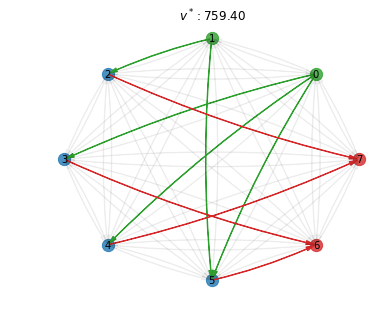

In [9]:
network_solution.plot_network()

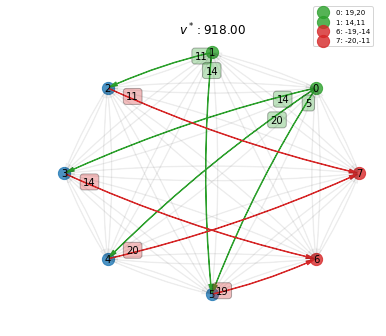

In [10]:
network_solution.plot_network(scen_index=0)